In [3]:
pip install numpy

In [4]:
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib


In [5]:
!pip install -U scikit-learn scipy matplotlib
!pip install sklearn


     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 11.2 MB 23.9 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
#from keras. optimisers import Adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model

In [7]:
#Get the Dataset
from google.colab import files
uploaded = files.upload()


Saving HistoricalQuotes.csv to HistoricalQuotes.csv


In [8]:
import pandas as pd
df = pd.read_csv('HistoricalQuotes.csv')
df.head() #Taking a quick look at the dataset (first 5 columns and rows)

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [9]:
#Print the shape of Dataframe  and Check for Null Values
from pandas import Series, DataFrame
print('Dataframe Shape: ', df. shape) #To check shape of data
print('Null Value Present: ', df.isnull().values.any()) #To check if any null values present in data

Dataframe Shape:  (2518, 6)
Null Value Present:  False


In [10]:
#Describe the dataframe df
df.describe() #To describe data

,Volume
count,2.518000e+03
mean,7.258009e+07
std,5.663113e+07
min,1.136205e+07
25%,3.053026e+07
50%,5.295469e+07
75%,9.861006e+07
max,4.624423e+08


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [21]:
df1 = df.iloc[:,1] #Selecting feature of Close/Last stock price, which is in the 2nd column, hence selecting only the second column
df1.head()

0     $273.36
1     $273.52
2     $292.65
3     $288.08
4     $298.18
Name:  Close/Last, dtype: object

In [22]:
df1 = df1.replace('[\$,]', '', regex=True).astype(float) #Replace Dollar sign with a conversion to float value
df1.head()

0    273.36
1    273.52
2    292.65
3    288.08
4    298.18
Name:  Close/Last, dtype: float64

In [24]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Text(0.5, 1.0, 'Close/Last Price of Apple Stock')

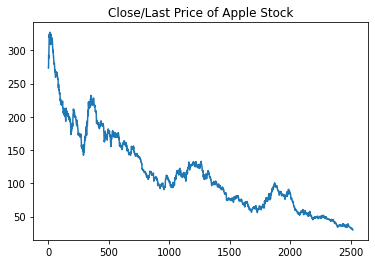

In [36]:
plt.plot(df1) #Plotting data using matplotlib library, for Close/Last stock over time
plt.title('Close/Last Price of Apple Stock')

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [38]:
df1.shape #Get shape of new dataframe, df1

(2518,)

In [39]:
#df1 is a vector, based on the shape. MinMaxScaler however, works on numpy 2D arrays. Hence, need to convert df1 to 2D array
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) #Conversion of df1 to 2D array
print(df1)
print('\n df1 present shape : ', df1.shape)

[[8.18942624e-01]
 [8.19480684e-01]
 [8.83812549e-01]
 ...
 [2.30693463e-04]
 [0.00000000e+00]
 [6.72575693e-05]]

 df1 present shape :  (2518, 1)


In [41]:
#Now the dataset can be split, after converting df1 to a 2D array
#Using a 70-30 train/test split, the data needs to be windowed. Hence, training and testing data will be stored in some variables
training_1 = int(len(df1)*0.7)
test_1 = len(df1) - training_1
print('Training Size : ',training_1)
print('Test Size : ',test_1)

data_train, data_test = df1[0:training_1,:],df1[training_1:len(df1),:]
print('Training Data Shape : ', data_train.shape)
print('Test Data Shape: ', data_test.shape)

Training Size :  1762
Test Size :  756
Training Data Shape :  (1762, 1)
Test Data Shape:  (756, 1)


In [43]:
#Since the stock price dataset is a time-series dataset (univariate), the splitting window must be used on the dataset
#This is to convert dataset into several series that are overlapping.


def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [72]:
#For this definition, window size = 100 and windowing is appled on training dataset

window = 100
X_train, y_train = create_dataset(data_train, window=100)
X_test, y_test = create_dataset(data_test, window=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1661, 100) (1661,)
(655, 100) (655,)


In [73]:
#The training and testing data both have 100 columns for the independent variable 
#The data needs to be re-shaped 3D as LSTM are build to only accept 3D data.

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [47]:
#Sequential,LSTM and Dense layers are used to build the model.
#The model is a LSTM stacked model (more than one LSTM layer)
#Mean Squared Error (MSE) is used for regression
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')

In [62]:
model.summary() #The summary of the model with LSTM layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
#Next, data must be fit with the model. Hence, training is performed using 100 epochs
#Batch size used is 64
#Since the model is trained, prediction for training model can then be performed

model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100, batch_size=64,verbose=1)


Epoch 1/100
26/26 [==============================] - 6s 237ms/step - loss: 1.0476e-04 - val_loss: 1694821772566783342107578767245312.0000
Epoch 2/100
26/26 [==============================] - 5s 193ms/step - loss: 1.0128e-04 - val_loss: 1694821772566783342107578767245312.0000
Epoch 3/100
26/26 [==============================] - 5s 192ms/step - loss: 1.0718e-04 - val_loss: 1694821772566783342107578767245312.0000
Epoch 4/100
26/26 [==============================] - 5s 188ms/step - loss: 1.1606e-04 - val_loss: 1694821772566783342107578767245312.0000
Epoch 5/100
26/26 [==============================] - 5s 191ms/step - loss: 1.4486e-04 - val_loss: 1694821772566783342107578767245312.0000
Epoch 6/100
26/26 [==============================] - 5s 193ms/step - loss: 1.0892e-04 - val_loss: 1694821772566783342107578767245312.0000
Epoch 7/100
26/26 [==============================] - 5s 192ms/step - loss: 9.7796e-05 - val_loss: 1694821772566783342107578767245312.0000
Epoch 8/100
26/26 [===============

In [64]:
#Model is now trained, hence, prediction must be checked on the testing dataset
#Prediction is stored in the pred_y variable
#The data for prediction is scaled, hence, the data will be inverse scaled.

pred_y = scaler.inverse_transform(model.predict(X_test))
pred_y[:5]

array([[94.291374],
       [93.87242 ],
       [93.2766  ],
       [93.63485 ],
       [95.11751 ]], dtype=float32)

In [75]:
test_y = scaler.inverse_transform(y_test.reshape(-1,1))

In [76]:
test_y[:5]

array([[94.4728],
       [94.1985],
       [95.3007],
       [97.3314],
       [95.0257]])

In [77]:
#From the first 5 predictions of the model, the predicted values are close to the real values (test_y). 
#Error and R^2 scores checking must be performed, to see the accuracy of the model

import math
from sklearn.metrics import mean_squared_error

rmse_score = math.sqrt(mean_squared_error(test_y,pred_y))
print('Root Mean Squared Error(test) : ',rmse_score)

Root Mean Squared Error(test) :  1.2758585290133733


In [79]:
#RMSE is 1.276, which means that predicted stock values of the model is close to the real values.
#Next, calculation of R^2 (R-squared score) is performed.

from sklearn.metrics import r2_score
print('R-squared Score  : ',r2_score(test_y,pred_y))

R-squared Score  :  0.9953253710579897


In [ ]:
#R-squared score is 0.99, which indicates that model prediction line closely fits the actual line


No handles with labels found to put in legend.


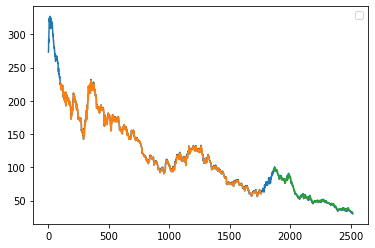

In [84]:
#Data visualization is performed, for the whole data, training and testing data in a single graph

# shift train predictions for plotting
train_prediction = scaler.inverse_transform(model.predict(X_train))

look_back=100
trainPredict_Plot = np.empty_like(df1)
trainPredict_Plot[:, :] = np.nan
trainPredict_Plot[look_back:len(train_prediction)+look_back, :] = train_prediction

# shift test predictions for plotting
testPredict_Plot = np.empty_like(df1)
testPredict_Plot[:, :] = np.nan
testPredict_Plot[len(train_prediction)+(look_back*2)+1:len(df1)-1, :] = pred_y

# plotting of baseline and predictions of testing and training dataset
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredict_Plot)
plt.plot(testPredict_Plot)
plt.legend()
plt.show()


In [86]:
#Using LSTM, 30 day prediction values can be performed and calculated.
#Value for Close/Last price for each day is calculated, and then 99 more values are created to create 100 values.
#Window size is set to 100 for prediction
#The following code will predict the stock price for Close/Last for the next 30 days

x_input=data_test[len(data_test)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [88]:
input_temp=list(x_input)
input_temp=input_temp[0].tolist()

In [90]:
#Prediction for next 30 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(input_temp)>100):
        print(input_temp)
        x_input=np.array(input_temp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        input_temp.extend(yhat[0].tolist())
        input_temp=input_temp[1:]
        print(input_temp)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        input_temp.extend(yhat[0].tolist())
        print(len(input_temp))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.020676994514808936, 0.01764535958082393, 0.019720928167907187, 0.020465469459514815, 0.021078858491083166, 0.020632604519103342, 0.023268764945892986, 0.024390621200998247, 0.023655495969085727, 0.023931588290860756, 0.01911090201480138, 0.018298766866096564, 0.01903860012785666, 0.020503806273987846, 0.022733058406809434, 0.02856059049455502, 0.027791836478017043, 0.028896878340809576, 0.029843192340169952, 0.03122668053966128, 0.029458815331900992, 0.03133429265046274, 0.030275658510453343, 0.028056158725173155, 0.02442424998562369, 0.02182508122192206, 0.021455164591042034, 0.02001383488199493, 0.01650198090355838, 0.019447189861055966, 0.020220651907441475, 0.022634526067856847, 0.02607206043227113, 0.0264705615300828, 0.024971726599326158, 0.023074054282911566, 0.021378154674249736, 0.016938818815843068, 0.017472507627849077, 0.018212340889609144, 0.016079267080816362, 0.01388868805031404, 0.018971342558605733, 0.020902643659645767, 0.021796160467144193, 0.021604140106932804, 0

In [91]:
new_day=np.arange(1,101)
pred_day=np.arange(101,131)

In [92]:
print(scaler.inverse_transform(lst_output))

[[31.66934241]
 [32.05588626]
 [32.42300512]
 [32.75569316]
 [33.05115768]
 [33.31117473]
 [33.5397018 ]
 [33.74177038]
 [33.92276865]
 [34.08786352]
 [34.24164586]
 [34.38791199]
 [34.52958808]
 [34.66878139]
 [34.8068625 ]
 [34.94460574]
 [35.08231907]
 [35.21999584]
 [35.35742669]
 [35.49428316]
 [35.63021187]
 [35.76487164]
 [35.89797388]
 [36.02928819]
 [36.15865614]
 [36.2859847 ]
 [36.4112445 ]
 [36.53444828]
 [36.65563149]
 [36.77487942]]


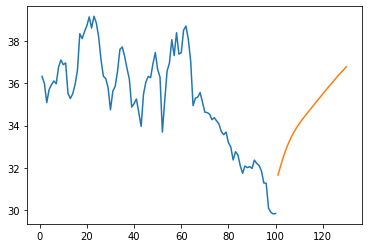

In [93]:
plt.plot(new_day,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(pred_day,scaler.inverse_transform(lst_output))